<h1><center><b>Machine Learning</b></center></h1>
<h3><center>Exercise 6</center></h3>
<h4><center>K-Means and PCA<center></h4>

*Your* Name:  
<font color='red'>
Eliyahu Dagi, 036781839   
</font>


**Instructions:**
- Create a copy of this notebook and implement your code in it.
- Make sure you don't leave empty cells or empty answers.
- You should not change the code we provided you.
- When you finish the assignment, download this ***notebook*** and ***predictions.txt*** and submit it to the [**"submit"**](https://submit.cs.biu.ac.il/cgi-bin/welcome.cgi) system. 
To Download the notebook go to **"File"** -> **"Download .ipynb"**.  
- Submit deadline: 18/1/2023

## Part 1 - K-Means (50%)

In this part you will have to implement the K-Means algorithm that was learned in class.<br>
**The implementation will be based on the numpy package only.**

In [1]:
%matplotlib notebook

### **1. Useful packages**

In [2]:
import matplotlib.pyplot as plt
import numpy as np


### **2. Data**

Generate a 2D dataset

In [3]:
## Generate 2D data 
X = np.concatenate([
    np.random.normal([0, 0], size=(500, 2)),
    np.random.normal([5, 5], size=(500, 2)),
    np.random.normal([5, 0], size=(500, 2)),
    np.random.normal([0, 5], size=(500, 2)),
])

# Shuffle the data
np.random.shuffle(X)

print(X.shape)

(2000, 2)


Plot the data to explore how many clusters it contains

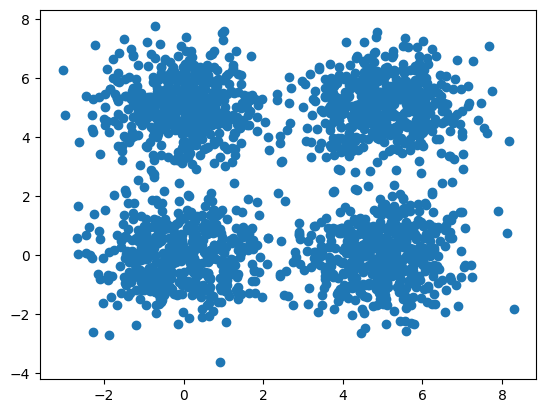

In [4]:
%matplotlib inline
plt.scatter(X[:, 0], X[:, 1], cmap='viridis')


In [5]:
kk = np.random.randn(10, 2)
cc = np.random.randn(3, 2)
zz = kk - cc[:, np.newaxis]
print(np.array([[[  1.18135037e+00,  -1.12951893e+00],
        [  3.19833710e-01,  -5.72897144e-02],
        [  1.66808263e+00,   4.60938179e-01],
        [  1.45933022e+00,  -1.33264298e+00]],

       [[  8.60193206e-01,  -8.20531719e-01],
        [ -1.32345648e-03,   2.51697498e-01],
        [  1.34692546e+00,   7.69925391e-01],
        [  1.13817306e+00,  -1.02365577e+00]],

       [[  1.90060876e+00,  -1.32052355e+00],
        [  1.03909210e+00,  -2.48294333e-01],
        [  2.38734102e+00,   2.69933560e-01],
        [  2.17858861e+00,  -1.52364760e+00]]]).shape)

(3, 4, 2)


### **3. K-Means**

Implement the algorithm

In [6]:
class KMeans():
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        
        ######## Helper fields #########
        self.X_fit_ = None      # Here you should store the dataset X. 
                                # This can be useful for the next tasks.
        
        self.labels_ = None     # Here you should store the final labels. 
                                # That is, the clusters indices for all the samples

        self.centroids = None   # Here you should store the final centroids.

        self.labels_history = []    # Here you should store the labels of each iteration.
                                    # This can also be useful later.
        
        self.centroids_history = [] # Here you should store the centroids of each iteration.
                                    # This can also be useful later.

        self.costs = []             # Here you should store the costs of the iterations.
                                    # That is, you should calculate the cost in every iteration
                                    # and store it in this list.


    def fit(self, X):
        self.X_fit_ = X
        self.centroids = X[np.random.choice(np.arange(X.shape[0]), self.n_clusters)]
        eps = 1e-8
        prev_cost = cost =float("inf")
        for i in range(self.max_iter):
            prev_cost = cost
            cost, labels = self._calculate_cost(X=X)
            if prev_cost - cost < eps:
                break
            self._save_step(cost, labels)
            # Update centroids
            for c in range(self.n_clusters):
                self.centroids[c] = np.mean(X[labels == c], axis=0)      
        self.centroids = self.centroids_history[-1]
        self.labels_ = self.labels_history[-1]          

    def predict(self, X):
        return self._get_labels(X)

    def _get_distances(self, X):
        return self.distance(X, self.centroids[:, np.newaxis])
    
    def _get_labels(self, X):
        return np.argmin(self._get_distances(X), axis=0)

    def _get_centroids(self, X, labels):
        return np.array([self.centroids[label] for label in labels])
    
    @staticmethod
    def distance(x, y):
        return np.sqrt(np.sum((x - y) ** 2, axis=-1))

    def _calculate_cost(self, X):
        labels = self._get_labels(X=X)
        centroids = self._get_centroids(X=X, labels=labels)
        dist_to_proto = self.distance(x=X, y=centroids)
        return np.mean(dist_to_proto, axis=0), labels

    def _save_step(self, cost, labels):
        self.labels_history.append(labels)
        self.centroids_history.append(self.centroids) 
        self.costs.append(cost)


Run the algorithm on the 2D dataset

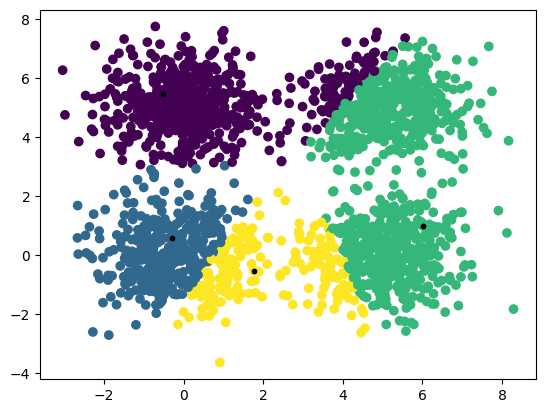

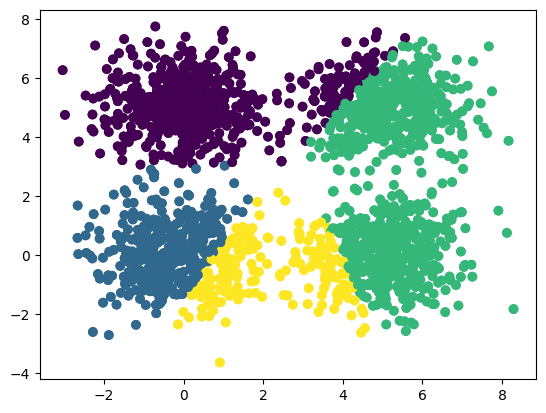

In [19]:
n_clusters = 4 
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)


Plot a graph of the costs as a function of the iterations

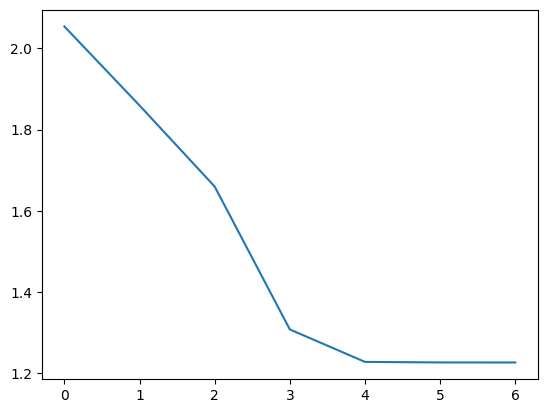

In [20]:
costs = kmeans.costs
plt.plot(costs)

Now run the algorithm several more times with n_clusters = 2, 3, 4, 6, 8, 10, 20 and write **below** the **final** cost you got in each experiment.<br>
2 clusters: 2.6689631915958874<br>
3 clusters: 1.9255728837023984<br>
4 clusters: 1.21705670163561<br>
6 clusters: 1.0949487217204157<br>
8 clusters: 0.9892165265108527<br>
10 clusters: 0.9030222421693371<br>
20 clusters: 0.6730467012041715<br>

In [12]:
#for num_clusters in [2, 3, 4, 6, 8, 10, 20]:
#    kmeans = KMeans(n_clusters=num_clusters)
#    kmeans.fit(X)
#    print(f'{num_clusters} clusters: {kmeans.costs[-1]}')

2 clusters: 2.6689631915958874
3 clusters: 1.9255728837023984
4 clusters: 1.21705670163561
6 clusters: 1.0949487217204157
8 clusters: 0.9892165265108527
10 clusters: 0.9030222421693371
20 clusters: 0.6730467012041715


Now write a code that plots the clusters and the locations of the centroids at each iteration

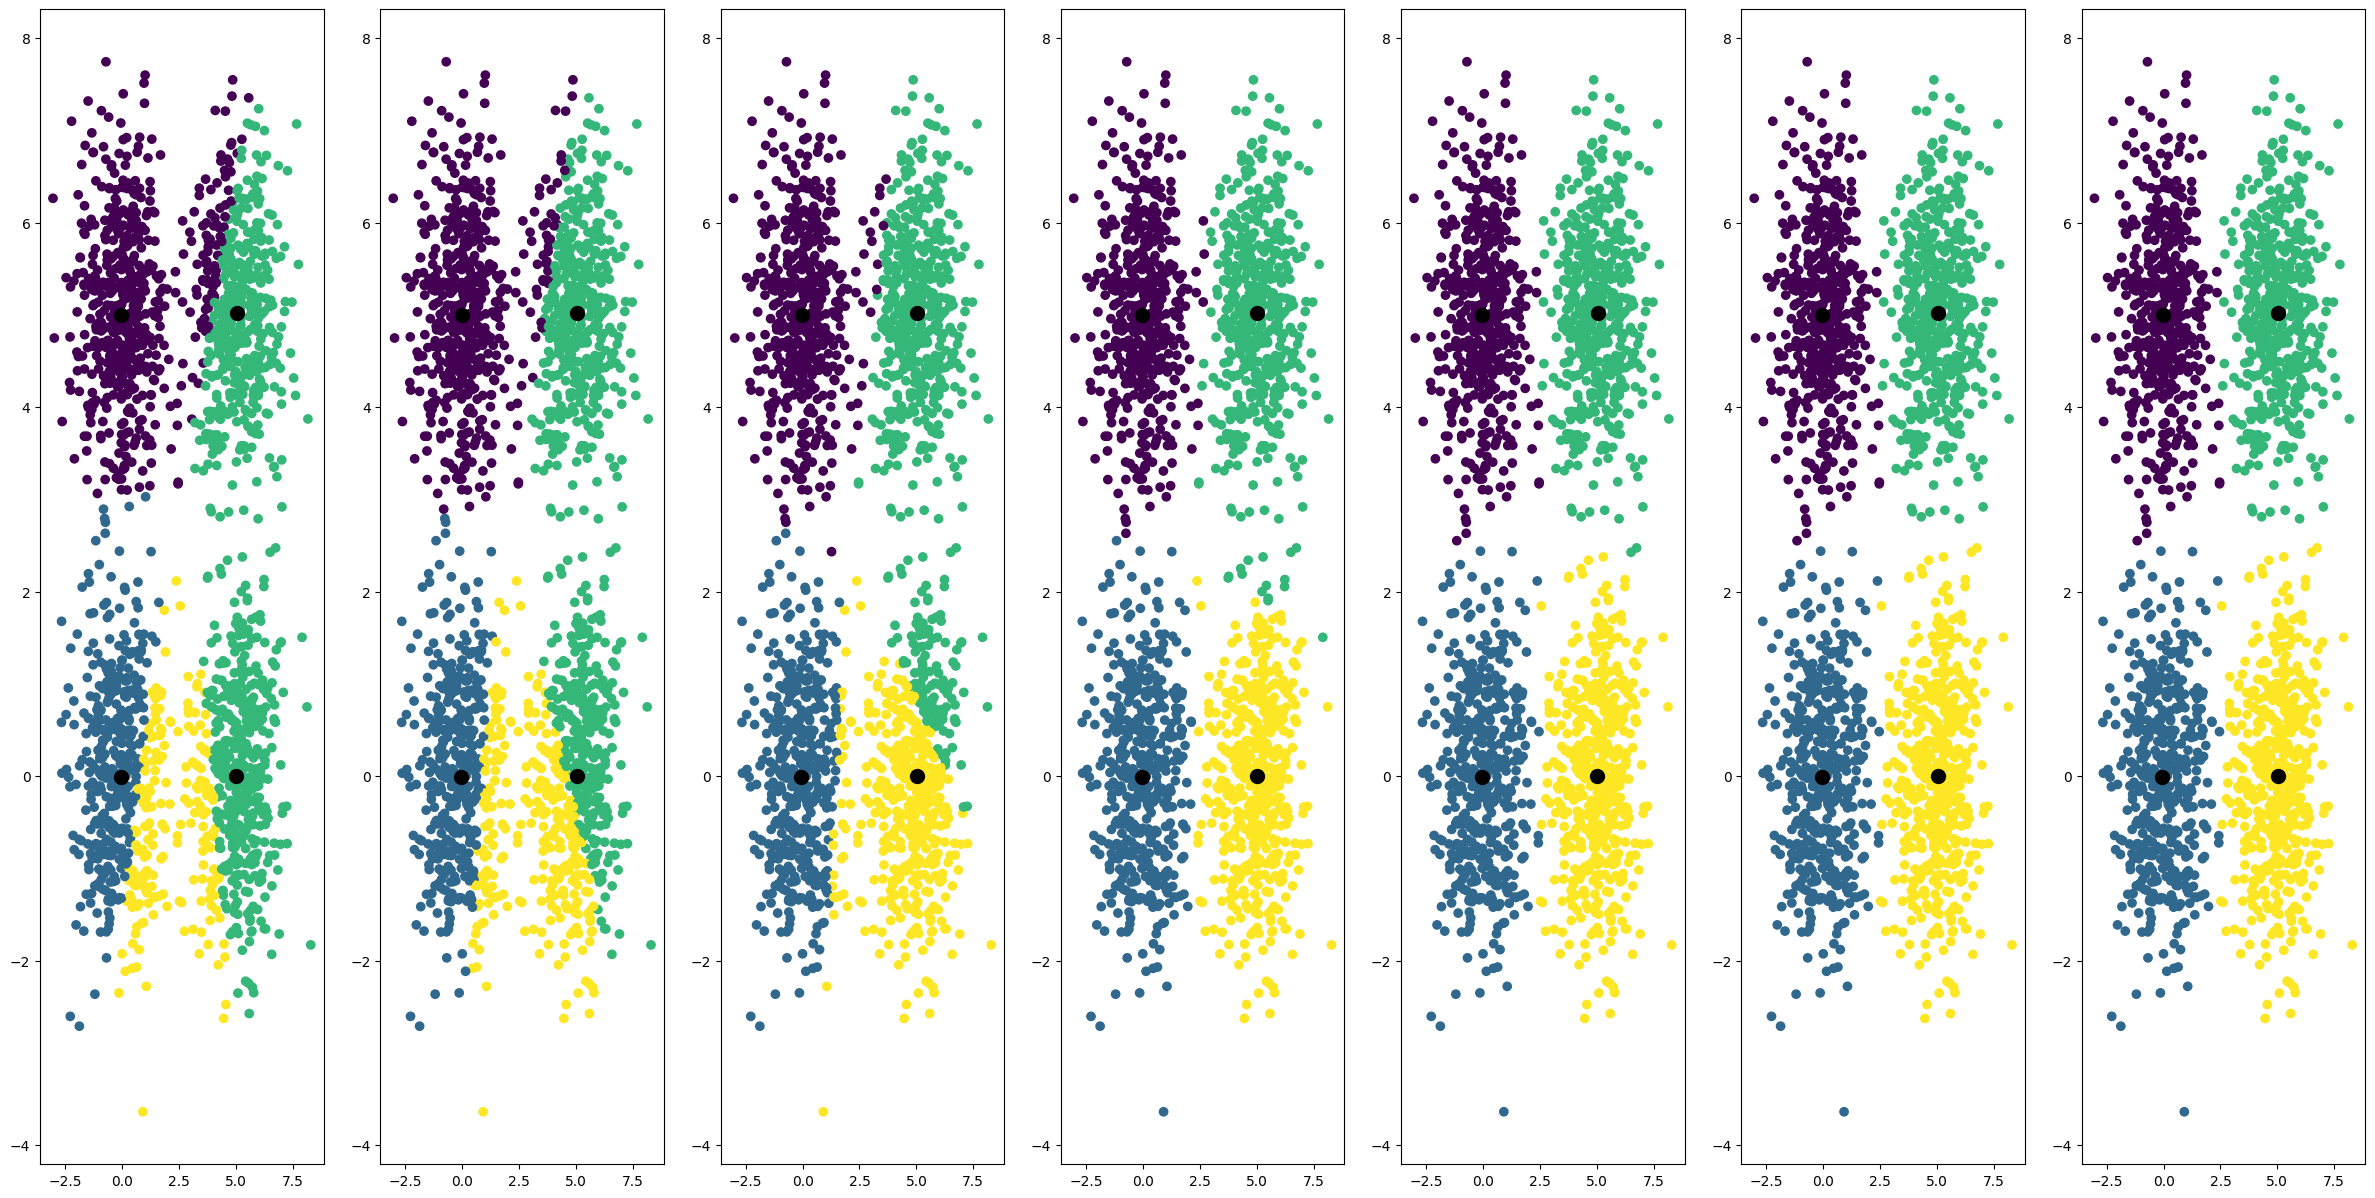

In [25]:
%matplotlib inline
fig, ax = plt.subplots(1, len(kmeans.labels_history), figsize=(30, 15))
for i in range(len(kmeans.labels_history)):
    ax[i].scatter(X[:, 0], X[:, 1], c=kmeans.labels_history[i])
    ax[i].scatter(kmeans.centroids_history[i][:,0] , kmeans.centroids_history[i][:,1] , s = 100, color = 'k')
plt.show()

## Part 2 - PCA (50%)

In this part you will implement the PCA algorithm on the MNIST dataset.<br>
**As in the first part, your implementation will be based on the numpy package only.**

### **1. Useful packages**

In [2]:
import matplotlib.pyplot as plt
import numpy as np 

from sklearn.datasets import fetch_openml

### **2. Data**

Load the MNIST dataset from sklearn datasets.

In [3]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

### **3. PCA**

Implement the PCA algorithm here.<br> Don't forget to center the data, i.e. make the mean of the columns of the dataset to 0.

In [ ]:
import numpy as np

class PCA:
    def __init__(self):
        self.V = None

    def fit(self, X):
        X = X - np.mean(X, axis=-1)[:, np.newaxis]
        X = np.matmul(X.T, X)
        self.V = self.get_eigen_vectors(X=X)
        return self.V

    def transform(self, X, n_dimentions):
        X_reduced = np.matmul(self.V[:, :n_dimentions].T, X.T)
        return X_reduced

    def get_eigen_vectors(self, X):
        eigen_values, eigen_vectors = np.linalg.eigh(X)
        idx = eigen_values.argsort()[::-1]   
        eigen_vectors = eigen_vectors[:,idx]
        return eigen_vectors
        



: 

Run the algorithm on MNIST dataset.

In [5]:
pca = PCA()
V = pca.fit(X)

# transform the data to the top 2 principal components
X_reduced = pca.transform(X, 2).T
print(X_reduced.shape)

(70000, 2)


Plot the data in the top 2 principal component space.

c:\Users\rnd\PycharmProjects\kuku\venv\lib\site-packages\matplotlib\collections.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


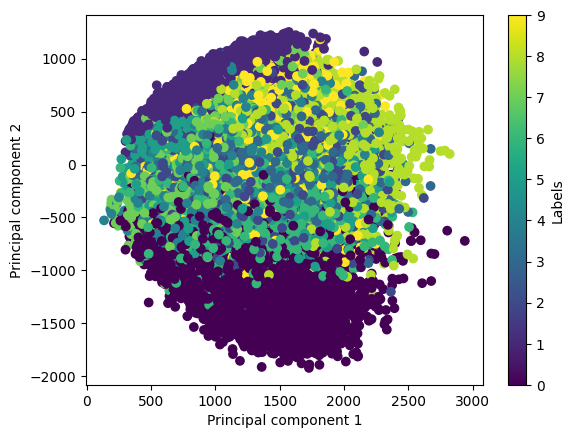

In [6]:
y = [int(label) for label in y]
fig, ax = plt.subplots()
scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')

cbar = fig.colorbar(scatter)
cbar.set_label('Labels')

ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')

plt.show()

As we showed in class, $V\in \mathbb{R}^{d\times r}$  is the matrix whose colmns are the top  $r$ eigenvectors of $X^TX$. That is, the eigenvectors that correspond to the  $r$ largest eigenvalues. <br>
In the cell below, Write a code that plots the two matrices $V^TV$ and $VV^T$.<br>
Explain the differences between the two matrices

In [16]:
r = 3
Vr = V[:,r]
VtV = np.matmul(Vr.T, Vr)
print(VtV)
#print(VtV[:3, :3])


Your Explanation:

Now write a function that projects a sample to a n-dimentional space  and **recontsturct** it to the original space.

In [ ]:
def pca_reconstruction(x, n_dimentions):
    #### YOUR CODE HERE ####
    return x_reconstructed

Now write code that samples a random image from the dataset, and uses the function above to project it into n-dimensional space and reconstruct it to the original space. <br><br>
Is the reconstructed image the original image?
<br><br>

Perform the reconstruction above from spaces of dimensions: 3, 10, 100.<br>


In [ ]:
########################
#### YOUR CODE HERE ####
########################